<a href="https://colab.research.google.com/github/isadoraxaavier/trabalho_estatistica/blob/Laura/Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# caminho do arquivo dentro do seu Drive
path = "/content/drive/MyDrive/Netflix (2).xlsx"
df = pd.read_excel(path)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,show_id,type,title,director,cast,country,date_added,release_year,rating,Classificação equivalente no Brasil,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,12 anos,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,18 anos,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,18 anos,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,18 anos,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,18 anos,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
# 🔎 Diagnóstico inicial da base Netflix
print("📌 Informações gerais:\n")
print("Formato (linhas, colunas):", df.shape)
print("\nNomes das colunas:\n", df.columns.tolist())

print("\n🔍 Tipos de dados e nulos:\n")
print(df.info())

print("\n🔍 Quantidade de valores nulos por coluna:\n")
print(df.isna().sum())

print("\n📌 Primeiras linhas da base:\n")
display(df.head())

📌 Informações gerais:

Formato (linhas, colunas): (8808, 13)

Nomes das colunas:
 ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'Classificação equivalente no Brasil', 'duration', 'listed_in', 'description']

🔍 Tipos de dados e nulos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   show_id                              8807 non-null   object 
 1   type                                 8807 non-null   object 
 2   title                                8790 non-null   object 
 3   director                             6173 non-null   object 
 4   cast                                 7982 non-null   object 
 5   country                              7976 non-null   object 
 6   date_added                           8797 non-null   object 
 7   relea

,show_id,type,title,director,cast,country,date_added,release_year,rating,Classificação equivalente no Brasil,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,12 anos,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,18 anos,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,18 anos,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,18 anos,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,18 anos,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


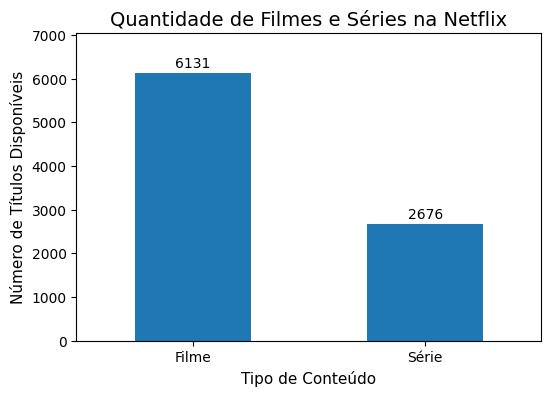

In [17]:
import matplotlib.pyplot as plt

# --- 5A: Tipo (com descrições mais explicativas) ---
# Substituir Movie/TV Show por Filme/Série
type_counts = df["type"].replace({"Movie": "Filme", "TV Show": "Série"}).value_counts()

plt.figure(figsize=(6,4))
ax = type_counts.plot(kind="bar", color="#1f77b4")

plt.title("Quantidade de Filmes e Séries na Netflix", fontsize=14)
plt.xlabel("Tipo de Conteúdo", fontsize=11)
plt.ylabel("Número de Títulos Disponíveis", fontsize=11)
plt.xticks(rotation=0)

# Ajusta o limite superior do eixo Y para dar mais espaço acima das barras
plt.ylim(0, type_counts.max() * 1.15)

for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=10, padding=2)

plt.show()


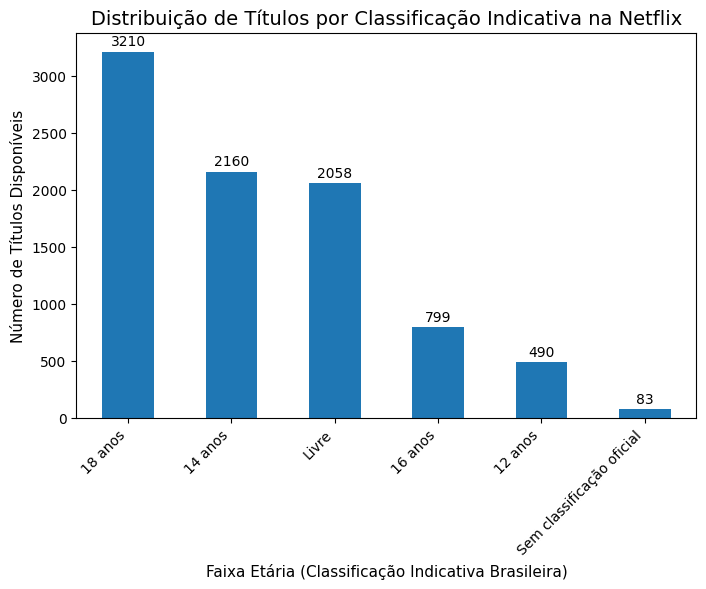

In [16]:
# --- 5B: Classificação no Brasil (com descrições mais explicativas) ---
rating_br_counts = df["Classificação equivalente no Brasil"].value_counts()

plt.figure(figsize=(8,5))
ax = rating_br_counts.plot(kind="bar", color="#1f77b4")

plt.title("Distribuição de Títulos por Classificação Indicativa na Netflix", fontsize=14)
plt.xlabel("Faixa Etária (Classificação Indicativa Brasileira)", fontsize=11)
plt.ylabel("Número de Títulos Disponíveis", fontsize=11)
plt.xticks(rotation=45, ha="right")


for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=10, padding=2)

plt.show()

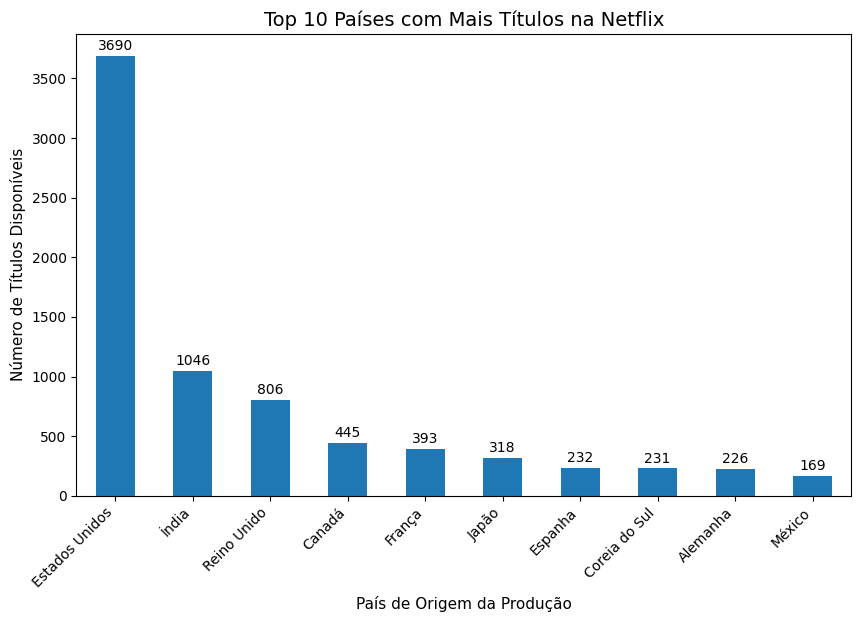

In [18]:
# --- 5C: Países com mais títulos ---
country_series = (
    df["country"]
    .dropna()
    .astype(str)
    .str.split(",")
    .explode()
    .str.strip()
)

# Dicionário de tradução
country_translation = {
    "United States": "Estados Unidos",
    "India": "Índia",
    "United Kingdom": "Reino Unido",
    "Japan": "Japão",
    "South Korea": "Coreia do Sul",
    "France": "França",
    "Canada": "Canadá",
    "Spain": "Espanha",
    "Germany": "Alemanha",
    "Mexico": "México",
    "Brazil": "Brasil",
    "Italy": "Itália",
    "China": "China"
}

# Aplicar tradução
country_series = country_series.replace(country_translation)

country_counts = country_series.value_counts().head(10)

plt.figure(figsize=(10,6))
ax = country_counts.plot(kind="bar", color="#1f77b4")

plt.title("Top 10 Países com Mais Títulos na Netflix", fontsize=14)
plt.xlabel("País de Origem da Produção", fontsize=11)
plt.ylabel("Número de Títulos Disponíveis", fontsize=11)
plt.xticks(rotation=45, ha="right")

for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=10, padding=2)

plt.show()

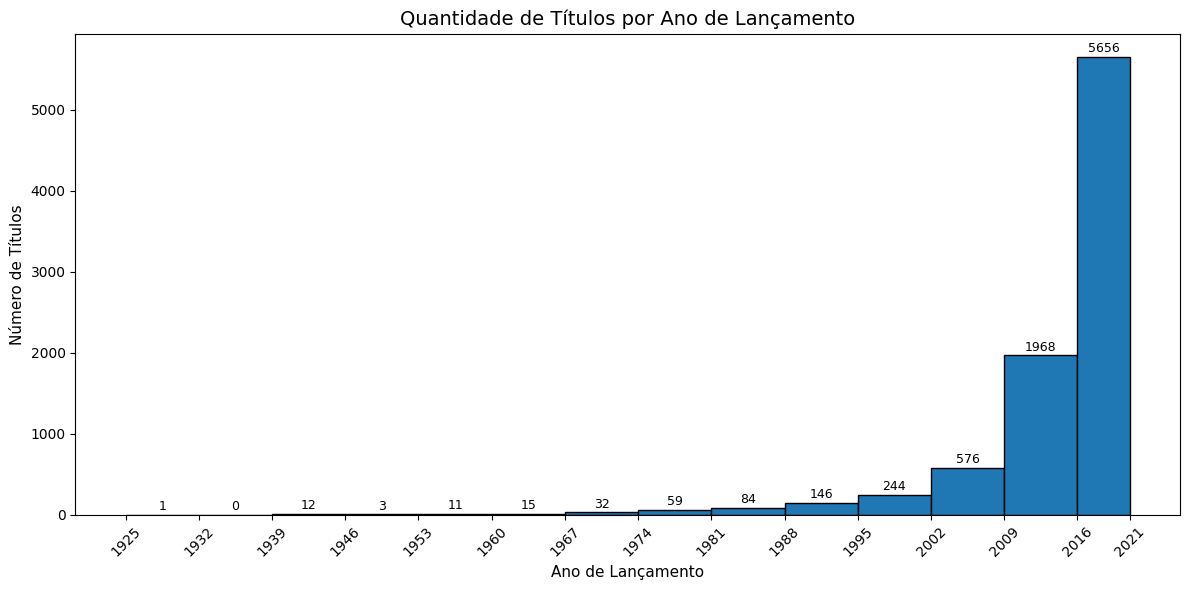

Ano mínimo: 1925
Ano máximo: 2021
Amplitude total (A): 96
Nº de observações (n): 8807
Nº de intervalos (k): 14.104718603852165 ≈ 14
Amplitude dos intervalos (Ak): 6.857142857142857


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# --- Selecionar os anos de lançamento ---
years = df["release_year"].dropna().astype(int)

# --- Passo 1: Amplitude total ---
year_min = years.min()
year_max = years.max()
A = year_max - year_min

# --- Passo 2: Número de intervalos (Sturges) ---
n = years.shape[0]
k = 1 + 3.322 * np.log10(n)   # fórmula de Sturges
k_round = int(round(k))       # número inteiro de intervalos

# --- Passo 3: Amplitude dos intervalos ---
Ak = A / k_round

# --- Criar intervalos ---
bins = list(range(year_min, year_max + 1, int(round(Ak))))
if bins[-1] < year_max:
    bins.append(year_max)

# --- Histograma ---
plt.figure(figsize=(12,6))
counts, bins, patches = plt.hist(
    years,
    bins=bins,
    color="#1f77b4",
    edgecolor="black"
)

plt.title("Quantidade de Títulos por Ano de Lançamento", fontsize=14)
plt.xlabel("Ano de Lançamento", fontsize=11)
plt.ylabel("Número de Títulos", fontsize=11)


# --- Valores em cima das barras ---
for i in range(len(counts)):
    plt.text(
        (bins[i] + bins[i+1]) / 2,  # centro do intervalo
        counts[i] + 20,             # altura um pouco acima
        str(int(counts[i])),
        ha="center",
        va="bottom",
        fontsize=9
    )

# --- Ajustar ticks do eixo X para mostrar os limites dos intervalos ---
plt.xticks(bins, rotation=45)

plt.tight_layout()
plt.show()

# Exibir parâmetros usados
print("Ano mínimo:", year_min)
print("Ano máximo:", year_max)
print("Amplitude total (A):", A)
print("Nº de observações (n):", n)
print("Nº de intervalos (k):", k, "≈", k_round)
print("Amplitude dos intervalos (Ak):", Ak)